In [1]:
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [3]:
from sklearn.metrics import *
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
import yfinance as yf 
from yfinance import download
from yfinance import Ticker
data = yf.Ticker("AAPL").history(period="1y")

In [5]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-10 00:00:00-04:00,184.280638,184.470004,181.519927,182.436844,50759500,0.25,0.0
2024-05-13 00:00:00-04:00,184.818823,186.473266,184.001563,185.656006,72044800,0.00,0.0
2024-05-14 00:00:00-04:00,186.881904,187.669266,185.665989,186.802170,52393600,0.00,0.0
2024-05-15 00:00:00-04:00,187.280568,190.011381,186.742369,189.084503,70400000,0.00,0.0
2024-05-16 00:00:00-04:00,189.831996,190.459891,189.024712,189.204102,52845200,0.00,0.0
...,...,...,...,...,...,...,...
2025-05-05 00:00:00-04:00,203.100006,204.100006,198.210007,198.889999,69018500,0.00,0.0
2025-05-06 00:00:00-04:00,198.210007,200.649994,197.020004,198.509995,51216500,0.00,0.0
2025-05-07 00:00:00-04:00,199.169998,199.440002,193.250000,196.250000,68536700,0.00,0.0


In [6]:
data.info


<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2024-05-10 00:00:00-04:00  184.280638  184.470004  181.519927  182.436844   
2024-05-13 00:00:00-04:00  184.818823  186.473266  184.001563  185.656006   
2024-05-14 00:00:00-04:00  186.881904  187.669266  185.665989  186.802170   
2024-05-15 00:00:00-04:00  187.280568  190.011381  186.742369  189.084503   
2024-05-16 00:00:00-04:00  189.831996  190.459891  189.024712  189.204102   
...                               ...         ...         ...         ...   
2025-05-05 00:00:00-04:00  203.100006  204.100006  198.210007  198.889999   
2025-05-06 00:00:00-04:00  198.210007  200.649994  197.020004  198.509995   
2025-05-07 00:00:00-04:00  199.169998  199.440002  193.250000  196.250000   
2025-05-08 00:00:00-04:00  197.720001  200.050003  194.679993  197.490005   
2025-05-09 00:00:00-04:00  199.000000  200.5

In [7]:
current_data = datetime.now()

In [8]:
start_time = datetime(current_data.year-1, current_data.month, current_data.day - 1) 

In [9]:
current_data

datetime.datetime(2025, 5, 10, 22, 56, 20, 903447)

In [10]:
data = yf.download("AAPL",start=start_time, end=current_data)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-05-09 to 2025-05-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (High, AAPL)    251 non-null    float64
 2   (Low, AAPL)     251 non-null    float64
 3   (Open, AAPL)    251 non-null    float64
 4   (Volume, AAPL)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [ ]:
# Flatten multi-level columns (if necessary)
data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Plot the data
fig = px.line(
    data,
    x=data.index,
    y=["Close AAPL"],
    title="Apple Stock Data"
)
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend"
)
fig.show()

In [12]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,222.157351,224.410468,219.494984,221.771012,5.608885e+07
std,17.023097,16.673225,17.295313,17.185929,3.238678e+07
min,172.419998,183.792180,169.210007,171.949997,2.323470e+07
25%,213.351433,215.283116,210.281107,212.894477,3.956285e+07
50%,224.256287,226.331875,222.515348,224.436039,4.807340e+07
75%,232.753716,234.517946,229.477700,232.697865,6.031885e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


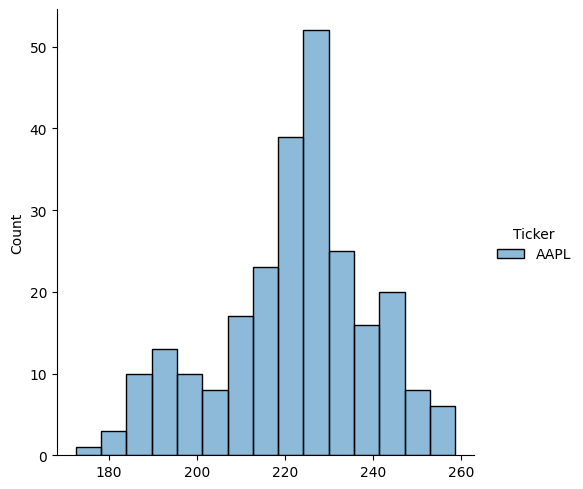

In [13]:
sns.displot(data["Close"])

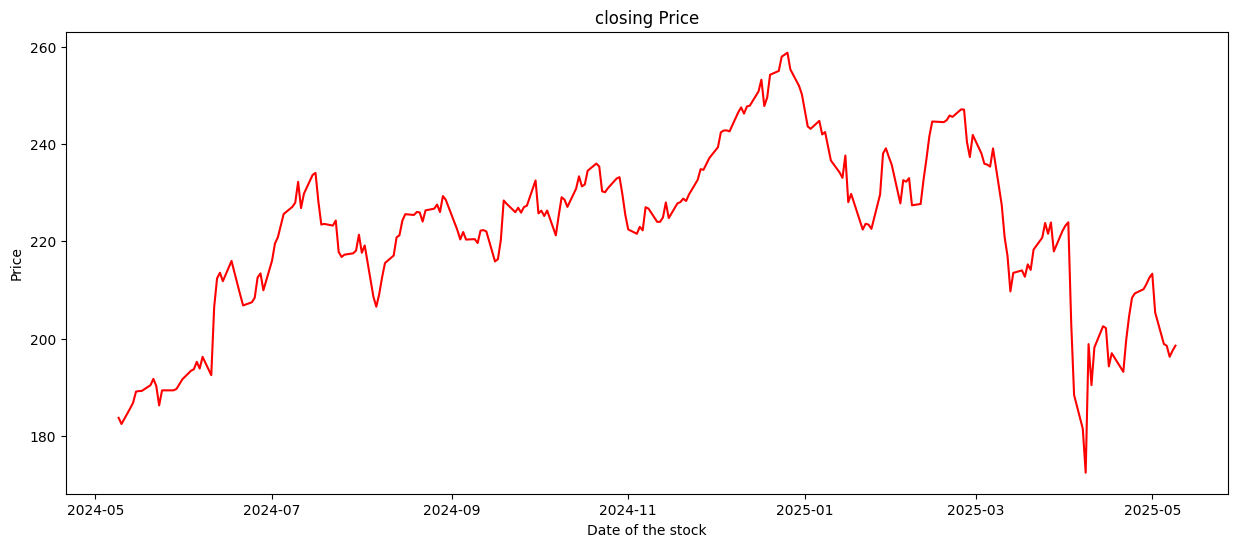

In [14]:
plt.figure(figsize=(15,6))
plt.plot(data.Close,color="red")
plt.title("closing Price")
plt.xlabel("Date of the stock")
plt.ylabel("Price")
plt.show()

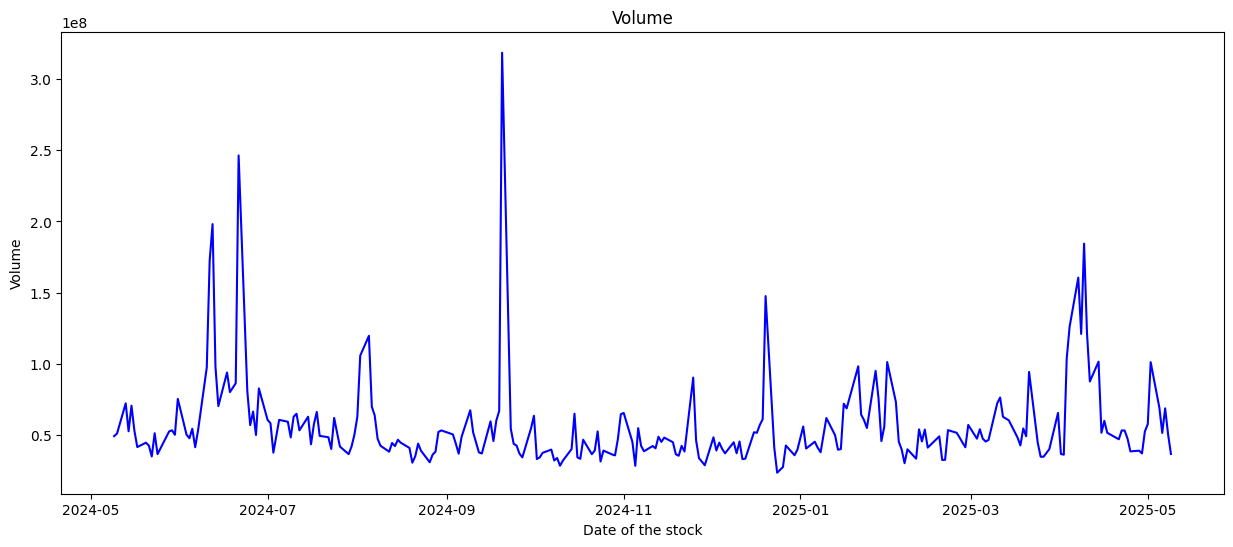

In [15]:
plt.figure(figsize=(15,6))
plt.plot(data["Volume"],color="blue")
plt.title("Volume")
plt.xlabel("Date of the stock") 
plt.ylabel("Volume")
plt.show()

In [16]:
moving_average = [10,20,50]
for x in moving_average:
    column_name = f"MA_{x} for {x } days"
    data[column_name] = data["Close"].rolling(x).mean()


In [17]:
data

Price,Close,High,Low,Open,Volume,MA_10 for 10 days,MA_20 for 20 days,MA_50 for 50 days
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2024-05-09,183.702606,183.792180,181.254160,181.702043,48983000,NaN,NaN,NaN
2024-05-10,182.436844,184.470004,181.519927,184.280638,50759500,NaN,NaN,NaN
2024-05-13,185.656006,186.473266,184.001563,184.818823,72044800,NaN,NaN,NaN
2024-05-14,186.802170,187.669266,185.665989,186.881904,52393600,NaN,NaN,NaN
2024-05-15,189.084503,190.011381,186.742369,187.280568,70400000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-05-05,198.889999,204.100006,198.210007,203.100006,69018500,207.340002,200.188502,214.656401
2025-05-06,198.509995,200.649994,197.020004,198.210007,51216500,207.217001,201.041001,213.684601


In [24]:
data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
fig = px.line(
    data,
    x=data.index,
    y=["Close AAPL", "MA_10 for 10 days", "MA_20 for 20 days", "MA_50 for 50 days"],
    title="Apple Stock Data with Moving Averages"
)
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend"
)
fig.show()

In [25]:
# Flatten multi-level columns (if necessary)
data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Calculate daily return
data["daily_return"] = data["Close AAPL"].pct_change()

In [26]:
data.head()

,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,MA_10 for 10 days,MA_20 for 20 days,MA_50 for 50 days,daily_return
Date,,,,,,,,,
2024-05-09,183.702606,183.792180,181.254160,181.702043,48983000,NaN,NaN,NaN,NaN
2024-05-10,182.436844,184.470004,181.519927,184.280638,50759500,NaN,NaN,NaN,-0.006890
2024-05-13,185.656006,186.473266,184.001563,184.818823,72044800,NaN,NaN,NaN,0.017645
2024-05-14,186.802170,187.669266,185.665989,186.881904,52393600,NaN,NaN,NaN,0.006174
2024-05-15,189.084503,190.011381,186.742369,187.280568,70400000,NaN,NaN,NaN,0.012218


In [27]:
fig= px.line(
    data,
    x=data.index,
    y=["daily_return"],
    title="Apple Daily Return"
)
fig.show()

In [28]:
fig = px.histogram(
    data,
    x="daily_return",
    title="change in daily return (percentage)", 
    nbins=100
)
fig.show()

In [43]:
data = yf.download("AAPL",start="2018-01-10", end=current_data)

[*********************100%***********************]  1 of 1 completed


In [44]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-10,40.956867,40.959219,40.653728,40.691328,95839600
2018-01-11,41.189518,41.238868,41.003875,41.027372,74670800
2018-01-12,41.614861,41.678310,41.276470,41.401016,101672400
2018-01-16,41.403374,42.155350,41.391623,41.805209,118263600
2018-01-17,42.087189,42.122436,41.140169,41.393957,137547200
...,...,...,...,...,...
2025-05-05,198.889999,204.100006,198.210007,203.100006,69018500
2025-05-06,198.509995,200.649994,197.020004,198.210007,51216500


In [45]:
# Flatten multi-level columns (if necessary)
data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Plot the data
fig = px.line(
    data,
    x=data.index,
    y=["Close AAPL"],
    title="Apple Stock Data"
)
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend"
)
fig.show()

In [46]:
df_Close=data[["Close AAPL"]]

In [47]:
len(df_Close)

1843

In [48]:
train_len = int(np.ceil(len(df_Close)*0.95))


In [49]:
train_len

1751

In [50]:
scaler = MinMaxScaler()

In [51]:
data_scaled = scaler.fit_transform(df_Close)

In [52]:
pd.DataFrame(data_scaled,columns=["Close AAPL"])

,Close AAPL
0,0.031321
1,0.032356
2,0.034248
3,0.033307
4,0.036349
...,...
1838,0.733807
1839,0.732117
1840,0.722065
1841,0.727580


In [53]:
train_data = data_scaled[:train_len,:]

In [59]:
x_train ,y_train = [],[]

In [66]:
x_train, y_train = [], []

# Generate sequences
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Ensure each sequence is of length 60
    y_train.append(train_data[i, 0])      # Ensure y_train is a single value

# Debugging: Check shapes
print(f"Number of sequences: {len(x_train)}")
print(f"Shape of first sequence in x_train: {len(x_train[0])}")
print(f"Shape of y_train: {len(y_train)}")

# Convert to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

Number of sequences: 1691
Shape of first sequence in x_train: 60
Shape of y_train: 1691


In [68]:
print(f"train_data shape: {train_data.shape}")
print(train_data[:5])  # Print the first 5 rows

train_data shape: (1751, 1)
[[0.0313211 ]
 [0.03235593]
 [0.03424786]
 [0.03330716]
 [0.03634877]]


In [69]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [70]:
model = Sequential()

In [71]:
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=30))
model.add(Dense(units=1))

In [89]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0037
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.5123e-04
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.7474e-04
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.9303e-04
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.3897e-04
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.8482e-04
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.8564e-04
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.5196e-04
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.8027e-04
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.5743e-04


In [90]:
# Prepare test data
test_data = data_scaled[train_len - 60:, :]
x_test, y_test = [], []

# Generate sequences for testing
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])  # Ensure each sequence is of length 60
    y_test.append(test_data[i, 0])      # Ensure y_test is a single value

# Convert to NumPy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

In [91]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 
                             1))

In [92]:
predictions = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step


In [93]:
predictions = scaler.inverse_transform(predictions)

In [94]:
RMSE = np.sqrt(np.mean(predictions - y_test)**2)
RMSE

np.float64(223.93083353226544)

In [95]:
train_data = df_Close[:train_len]
prediction_data = df_Close[train_len:]

In [96]:
prediction_data["Predictions"] = predictions
prediction_data

,Close AAPL,Predictions
Date,,
2024-12-26,258.735504,253.582596
2024-12-27,255.309296,255.554352
2024-12-30,251.923019,256.296722
2024-12-31,250.144974,255.506454
2025-01-02,243.582199,253.746536
...,...,...
2025-05-05,198.889999,211.383286
2025-05-06,198.509995,207.960175
2025-05-07,196.250000,204.089523


In [98]:
# Flatten multi-level columns (if necessary)
prediction_data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in prediction_data.columns]

# Access the correct columns
a = prediction_data["Close AAPL"].values
b = prediction_data["Predictions"].values

In [99]:
fig = px.line(
    prediction_data,
    x=prediction_data.index,
    y=["Close AAPL", "Predictions"],
    title="Apple Stock Price Prediction"
)
fig.add_scatter(
    x=prediction_data.index,
    y=prediction_data["Close AAPL"],
    mode="lines",
    name="Actual Price",
    line=dict(color="blue")
)
fig.add_scatter(
    x=prediction_data.index,
    y=prediction_data["Predictions"],
    mode="lines",
    name="Predicted Price",
    line=dict(color="red")
)
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend"
)
fig.show()